In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

KeyboardInterrupt: 

In [31]:
def plot_dataset(df, x, y, title="", color="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,6), dpi=dpi)
    plt.plot(x, y, color)
    plt.show()

In [32]:
dataset = pd.read_csv('coin_Bitcoin.csv', header = 0)

In [33]:
dataset = dataset.drop(['Volume', 'Symbol', 'Name', 'Marketcap', 'SNo'], axis = 1)

In [34]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset = dataset.set_index('Date')

In [35]:
dataset.head()

,High,Low,Open,Close
Date,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000


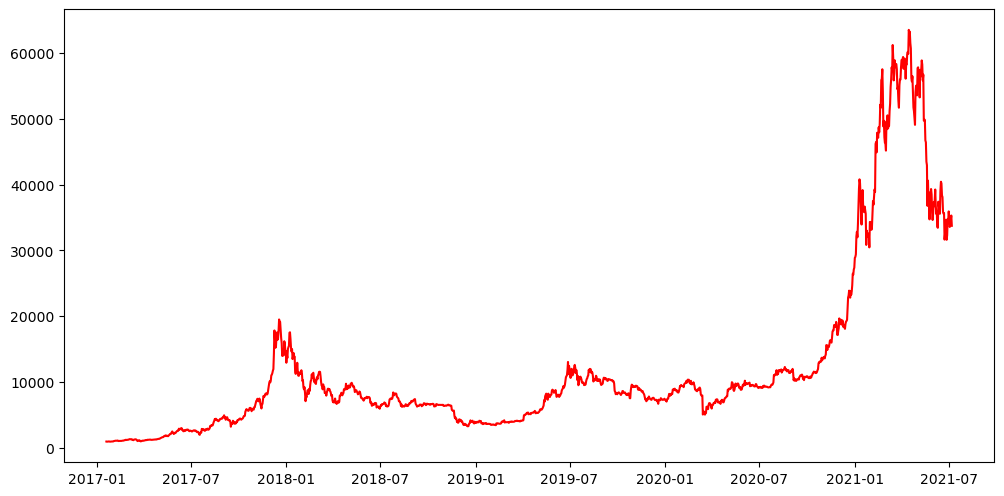

In [39]:
plot_dataset(dataset, dataset.index[1360:], dataset['Open'][1360:], "Exchange open-value per day", 'r')

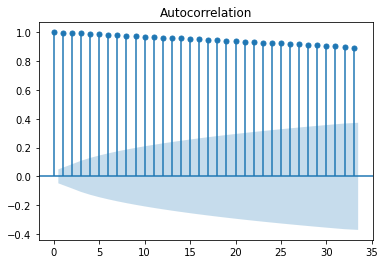

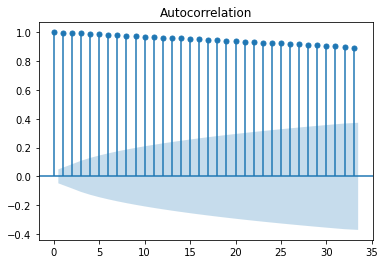

In [42]:
plot_acf(dataset['Open'][1360:])

In [43]:
import statsmodels.tsa.stattools as ts
ts.kpss(dataset['Open'][1360:], regression='c', nlags='auto', store=False)

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


(2.774651269167267,
 0.01,
 26,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### Ми бачимо як на графіку автокореляції, так і на KPSS-тесті - наш часовий ряд не є стаціонарним, отже спробуємо його стаціонаризувати

In [45]:
dataset['Diff'] = np.diff(dataset.Open, append = 32000)
dataset['Diff_2'] = np.diff(dataset.Diff, append = 10)
dataset['Diff_3'] = np.diff(dataset.Diff_2, append = 10)

In [46]:
dataset['Log'] = np.log(dataset.Open)
dataset['Log_Diff'] = np.diff(dataset.Log, append = 10.5)
dataset['Log_Diff_Diff'] = np.diff(dataset.Log_Diff, append = -0.75)

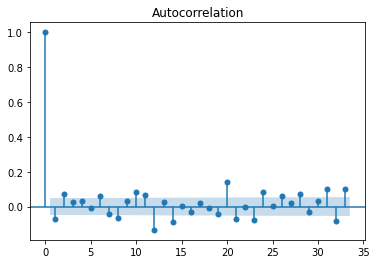

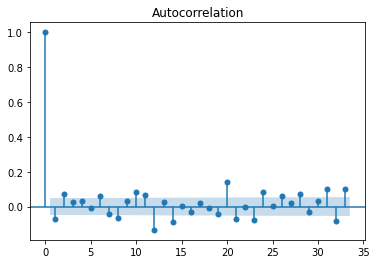

In [57]:
plot_acf(dataset.Diff[1360:])

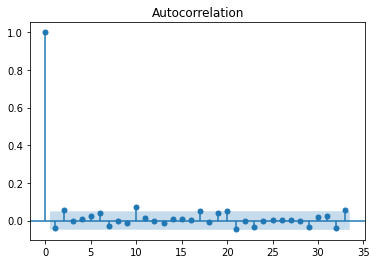

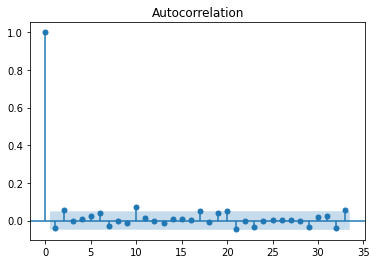

In [63]:
plot_acf(dataset.Log_Diff[1360:])

In [69]:
import statsmodels.tsa.stattools as ts

ts.kpss(dataset['Log_Diff'][1360:], regression='c', nlags='auto', store=False)

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


(0.16866488283069073,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [71]:
ts.kpss(dataset['Diff'][1360:], regression='c', nlags='auto', store=False)

E:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


(0.10753332792110183,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

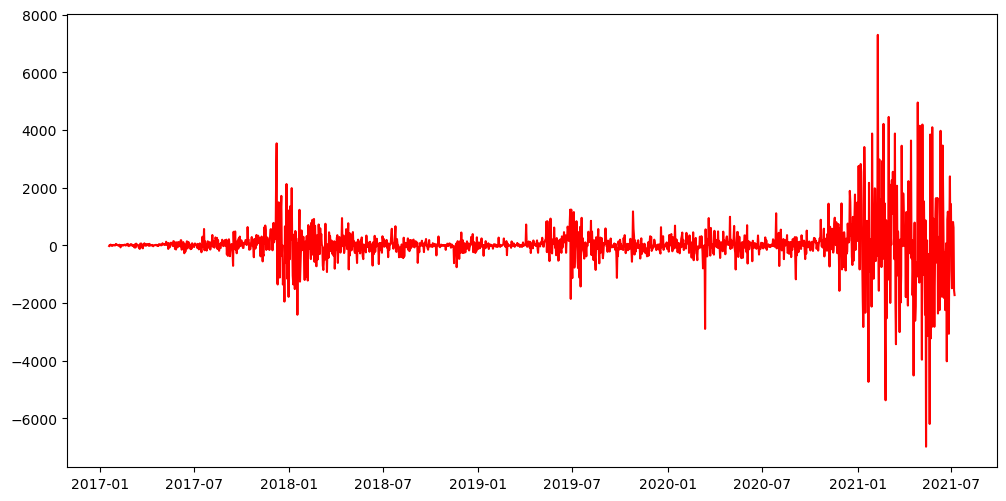

In [72]:
plot_dataset(dataset, dataset.index[1360:], dataset['Diff'][1360:], "Exchange open-value per day", 'r')